In [1]:
# 必要なモジュールをインポート
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

# 環境変数の読み込み
load_dotenv("../.env")
os.environ['OPENAI_API_KEY'] = os.environ['API_KEY']

# モデル名
MODEL_NAME = "gpt-4o-mini"

In [2]:
# 検索ツールの定義
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]

In [3]:
tool.invoke("Langgraphのノードとは？")

[{'url': 'https://zenn.dev/tomodo_ysys/articles/langgraph-basic-elements',
  'content': 'LangGraph公式のLow Level Conceptual Guideをもとに、LangGraphの主要要素の**graph**,**state**,**node**,**edge**についてまとめます。 from langchain_community.tools.tavily_search import TavilySearchResults from langgraph.graph import StateGraph from langgraph.graph.message import add_messages from langgraph.prebuilt import ToolNode, tools_condition from langgraph.graph import START,END graph_builder = StateGraph(State) tool = TavilySearchResults(max_results=2) tools = [tool] # state["messages"].append(llm_with_tools.invoke(state["messages"])) # return state return {"messages": [llm_with_tools.invoke(state["messages"])]} graph_builder.add_node("chatbot", chatbot) tool_node = ToolNode(tools=[tool]) graph_builder.add_node("tools", tool_node) graph_builder.add_conditional_edges( tools_condition, graph_builder.add_edge("tools", "chatbot") graph_builder.set_entry_point("chatbot") # graph_builder.add_edge(START, "chatbot") # graph_b

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

# Stateクラスの定義
class State(TypedDict):
    messages: Annotated[list, add_messages]

# グラフのインスタンスを作成
graph_builder = StateGraph(State)

# 言語モデルの定義
llm = ChatOpenAI(model_name=MODEL_NAME)

# 変更点：ツール定義の紐づけ
llm_with_tools = llm.bind_tools(tools)

# チャットボットノードの作成
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# グラフにチャットボットノードを追加
graph_builder.add_node("chatbot", chatbot)

In [5]:
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

# ツールノードの作成
tool_node = ToolNode(tools)

# グラフにツールノードを追加
graph_builder.add_node("tools", tool_node)

# 条件付エッジの作成
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition, # ツール呼出と判断したらツールノードを呼ぶ
)

# ツールが呼び出されるたびに、チャットボットに戻って次のステップを決定
# ツールからチャットボットへの戻りエッジを作成
graph_builder.add_edge("tools", "chatbot")

# 開始ノードの指定
graph_builder.set_entry_point("chatbot")

# 記憶を持つ実行可能なステートグラフの作成
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

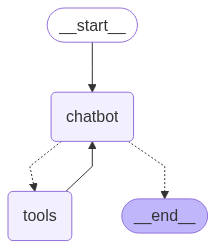

In [6]:
# グラフの可視化
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
# グラフの実行と結果の表示
def stream_graph_updates(user_input: str):
    events = graph.stream(
        {"messages": [("user", user_input)]},
        {"configurable": {"thread_id": "1"}},
        stream_mode="values")
    # 結果をストリーミングで得る
    for event in events:
        print(event["messages"][-1].content, flush=True)

# チャットボットのループ
while True:
    user_input = input("質問:")
    if user_input.strip()=="":
        print("ありがとうございました!")
        break
    stream_graph_updates(user_input)

1たす2は？
1たす2は3です。
1メートル以上の魚は？

[{"url": "http://world-rivers.net/info03.html", "content": "大型魚は小型魚にはない存在感と、ダイナミックに泳いでいる姿など様々な魅力があります。しかし、大型であるがために注意しなければならない点もいくつかございます。"}, {"url": "https://tsurihack.com/8448", "content": "# 【怪魚釣り】メーターオーバーの怪魚たちを難易度別にご紹介 今回は、身近な河川で狙える手軽に狙える怪魚から、幻の魚と言われる怪魚まで。 2024/06/12 更新 * + 魚の力強さを体感できる + 迫力満点な写真が撮れます + “目標を持った魚釣りの魅力”をお伝えしたい * + どんな大物を釣りたいか決めましょう + 何処でどんな釣り具を使えば釣れるか勉強しましょう + 諦めずに釣り場に通いましょう * + 大物は意外と身近にもいるんです * + 1mを超えるコイは超絶レアですよ！ * + 噛まれると怪我をするので要注意 + 冬のウツボをぜひ味わってみて欲しい * + ちなみに……オオウナギはあまり美味しくないんです * + 比較的大人しいサメですが、噛まれないように注意しましょう * + ヘラブナ用のエサと仕掛けで釣ることができます * + 近所の川や池に一際大きい魚が棲んでいないか観察してみよう * + 大物釣りの魅力が味わえるビワコオオナマズ釣り * + 日本が誇るスーパースター“アカメ” * + 何日も何か月も、時に何年も釣れないことがある幻の魚 * + ライタープロフィール + 関連記事 ## 大物を釣る楽しさと魅力を語る ### 魚の力強さを体感できる 大物釣りの魅力のひとつに、**魚達の力強さを一本の釣り糸を通して体感できる**ことがあります。 もちろん、魚の引きの強度やランディングに至るまでの難易度は魚種によってさまざま。今回の記事では、難易度別に魅力的な大物をご紹介していきます。 ### 迫力満点な写真が撮れます 自分なりに苦労したり試行錯誤して釣り上げた大物の写真って、時間が経っても見返したくなるものです。 時には魚体が大きすぎて陸に揚げられず、自ら水中に入って写真を撮るなんてこともよくあります。 大物を狙